# Names

In [1]:
from prep_n_load import *
from nlp_helpers import tokenize_and_count

Mon Sep  6 08:16:40 2021  UTC
5645 parcels loaded.


## Ratio of parcels without a name

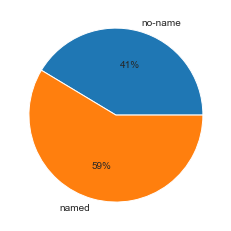

In [2]:
nonameratio = parcels[parcels.name.isna()].id.count() / parcels.shape[0]
_, ax = plt.subplots()
_ = ax.pie([nonameratio, 1 - nonameratio], labels=["no-name", "named"], autopct="%1.0f%%")


## Often used words in parcel names

In [3]:
from collections import Counter
all_names = (p["name"] for p in parcels_json if p["name"] and len(p["name"]) > 1)
c = Counter()
for name in all_names:
    c.update(tokenize_and_count(name))
print(counter_to_string(c, 50))


  371: gallery
  135: mvb
  101: art
   65: tower
   50: hq
   48: pranksyland
   47: nft
   41: club
   38: house
   35: center
   33: park
   31: temple
   31: museum
   31: bronx
   30: meta_vs
   28: pp
   28: dcl
   28: beach
   27: plazas
   27: studio
   26: sandbox
   23: garden
   23: zonte
   23: tbd
   23: paraverse
   21: space
   21: store
   21: crypto
   21: vibes
   20: voxel
   20: shop
   20: north
   20: satoshi
   19: collection
   19: tomato
   18: portal
   18: hub
   18: building
   18: exhibition
   18: milan
   17: artwall
   17: plaza
   17: blockchain
   17: tokyo
   17: berlin
   16: meta
   16: synoptic
   16: group
   15: future
   15: lounge


* MVB = Metaverse billboards

## Top used words per island

In [4]:
for island_name, row in (
    parcels[~parcels.name.isna()]
    .groupby("island")["name"]
    .apply(" ".join)
    .to_frame()
    .iterrows()
):
    print(island_name)
    print(counter_to_string(tokenize_and_count(row["name"])))
    print()

Berlin
   25: gallery
   17: berlin
   11: m0na
    8: magall
    8: ebc
    8: blockchain
    8: global
    8: solution
    8: group
    6: art

Ceres
    9: ceres
    5: gallery
    4: wei
    4: lounge
    3: synoptic
    3: tower
    3: mezzanine
    2: voxel
    2: market
    2: galactical

Electron
    5: electron
    3: paraverse
    2: hall
    1: domain
    1: domains
    1: pixls
    1: pride
    1: gallery
    1: teleport
    1: mvb

Euro
    5: euro
    4: portal
    4: tower
    3: gallery
    2: vtg
    2: hub
    2: metaversatile
    2: studios
    2: zandihar
    1: 205

Far Far Away
   12: school
   12: data
   12: science
    8: far
    5: away
    5: gallery
    2: uncle
    2: bitcoin
    2: pixel
    2: lounge

Helios
   20: gallery
    7: art
    6: nemausa
    6: corner
    5: helios
    5: helio
    4: row
    4: studio
    3: blavinci
    3: pit

Little Ceres
    1: neustreet
    1: hq

Miami
    7: miami
    5: gallery
    3: height
    2: hq
    2: club
    2

* The people in Bronx sure like their island name.